# Simulate Random Walks

In [15]:
from __future__ import annotations
import math
import argparse
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from helpers.calc_lucas_path import *
from helpers.draw_bgw_tree import *

## Define Probability distibution and Tree size
Here, we define a heavy tailed distibution. More precisely a distribution that is in the domain of attraction of a Cauchy random variable.

Plug in your own probability distibution to experiment.


In [9]:
n = 1000  # size of tree

i = np.arange(0,n,1)
p_i = np.arange(0,n,1)+0.0

p_i[0]=0.5
p_i[1]=0.3
p_i[2:] = 0.3/(p_i[2:]**2*np.log(p_i[2:])**2)

#normalize:
p_i /= np.sum(p_i)

## Sample a random excursion

/var/folders/5j/0nv4r5p16_b6xn2dltbl1nq40000gn/T/ipykernel_16402/855076741.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


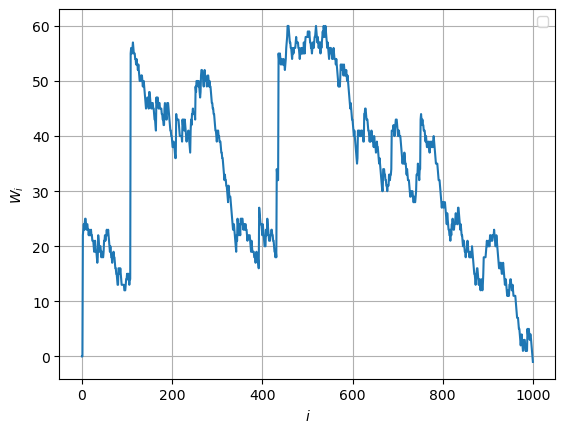

In [10]:
position, x = calc_lucas_path(n, p_i)
plt.plot(position)

plt.xlabel('$i$')
plt.ylabel('$W_i$')
plt.grid(True)
plt.legend()
plt.show()

## Plot the corresponding Bienayme-Galton_Watson tree

In [11]:
children = x + 1
scale  = 1.0

In [12]:
children_sequence = reconstruct_plane_tree(children)
pos_radial = radial_layout(children_sequence, root=0, rstep=1.0 * scale,angle_span=(0.0, 2 * math.pi))
out = "radial_tree.png"
draw_tree(children_sequence, pos_radial, out=out, labels=False, figsize_scale=0.25 * scale)

In [13]:
# One can also create a tidy tree where the children are ordered in rows.  The problem is that if the condensation phenomenon occurs, the tree is very wide.
pos_tidy = tidy_layout(children_sequence, root=0)
out = "tidy_tree.png"
draw_tree(children_sequence, pos_tidy, out=out, labels=False, figsize_scale=0.25 * scale)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
